<a href="https://colab.research.google.com/github/kimdain0222/deep_learning2/blob/main/14%EC%A3%BC%EC%B0%A8(%EA%B5%90%EC%88%98ver)load_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- image를 로드한 후, `X`, `y`를 ndarray로 저장함

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

- `os.listdir(path)`: `path`가 포함하는 모든 파일과 폴더의 목록을 `list type`으로 반환함

In [ ]:
class_path = os.listdir('datasets')
print(class_path)
# datasets는 각 class에 해당하는 폴더를 가지고 있음
# 각 class의 폴더는 해당 class에 속하는 image 데이터를 가지고 있음

['non-vehicles', 'vehicles']


- 각 클래스에 속하는 데이터의 수 및 전체 데이터의 수 확인
- `os.path.join(str1,str2)`: `str1`과 `str2`를 결합한 path 생성

In [ ]:
num_class = len(class_path)
num_class_data = []

for i in class_path:
    # i = 'non-vehicles', 'vehicles'
    # 각 class에 속하는 image가 저장된 path 생성
    class_img_path = os.path.join('datasets',i)
    # class_img_path에 저장된 image의 수
    num_class_data.append(len(os.listdir(class_img_path)))

# 총 데이터의 수
num_data = sum(num_class_data)

print('class의 수: ',num_class)
print('class 이름(label): ',class_path)
print('각 class에 속한 data의 수: ',num_class_data)
print('총 data의 수: ',num_data)

class의 수:  2
class 이름(label):  ['non-vehicles', 'vehicles']
각 class에 속한 data의 수:  [300, 200]
총 data의 수:  500


- image data 로드 후, ndarray로 저장

In [ ]:
# 초기화된 X와 y
X = np.zeros((num_data,64,64,3))     # 이미지는 가로 64, 세로 64, 3채널 이미지를 사용함
y = np.zeros(num_data).astype('str') # y는 폴더명을 그대로 사용함
# astype을 적용하지 않을 경우, default로 float가 type으로 지정되며,
# float인 상태로 str을 저장하면 NaN이 저장됨

- `keras.image.load_img(path)`: path의 image를 로드함

In [ ]:
ind = 0
for i in class_path:
    class_img_path = os.path.join('datasets',i)
    for j in os.listdir(class_img_path):
        # j: class_img_path가 포함한 이미지 파일의 목록
        # image j를 로드하여 X에 순서대로 저장
        # 이 때, image j의 path가 필요함
        img_path = os.path.join(class_img_path,j)
        X[ind] = image.load_img(img_path) # image 로드 후, 저장
        y[ind] = i # 폴더명을 저장
        ind += 1

In [ ]:
X.shape
# 64x64 3channel(RGB) 이미지가 500개 저장되어 있음

(500, 64, 64, 3)

In [ ]:
y.shape
# non-vehicles 또는 vehicles가 저장되어 있음

(500,)

- `X`, `y` **ndarray** 저장
- `np.savez(filename,ndarray1,ndarray2,..)`: 복수의 ndarray를 저장

In [ ]:
np.savez('vehicle_data',X,y)

vehicles


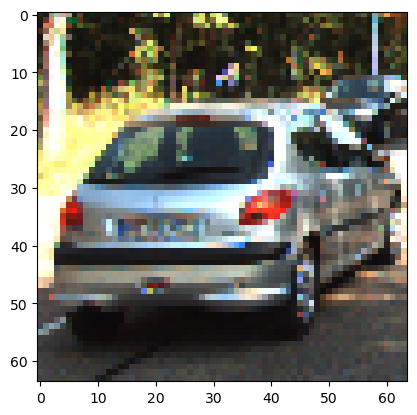

In [ ]:
# plt.imshow를 통해 ndarray를 이미지로 보기 위해서는
# 반드시 ndarray의 dtype이 float와 같은 실수가 아닌, int type이어야 함
plt.imshow(X[400].astype('int'))
print(y[400])